# Under- and Over-Sampling Techniques

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from matplotlib.markers import MarkerStyle
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("data.csv")

### Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009
https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

In [4]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [8]:
num_yes = len(df[df['Bankrupt?'] == 1])
num_no = len(df[df['Bankrupt?'] == 0])

In [9]:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i], y_list[i], size=16)

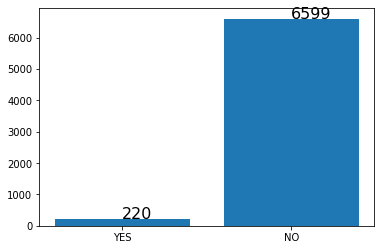

In [10]:
plt.bar(['YES', 'NO'], [num_yes, num_no])
add_value_label(['YES', 'NO'], [num_yes, num_no])

### Split dataset into x and y

In [12]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [13]:
x.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [15]:
y.head()

,Bankrupt?
0,1
1,1
2,1
3,1
4,1


## PCA (for visualization in 2D)

In [16]:
pca = PCA(n_components=2)

In [17]:
principalComponents = pca.fit_transform(x)

In [18]:
pca_df = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [19]:
pca_df.head()

,pc1,pc2
0,2.165330e+09,-3.814949e+07
1,4.902366e+08,8.463795e+09
2,-2.620138e+09,-2.169966e+09
3,3.249284e+09,5.987899e+09
4,7.604602e+09,-2.951427e+09


In [20]:
final_df = pd.concat([pca_df, y], axis = 1)

In [21]:
final_df.head()

,pc1,pc2,Bankrupt?
0,2.165330e+09,-3.814949e+07,1
1,4.902366e+08,8.463795e+09,1
2,-2.620138e+09,-2.169966e+09,1
3,3.249284e+09,5.987899e+09,1
4,7.604602e+09,-2.951427e+09,1


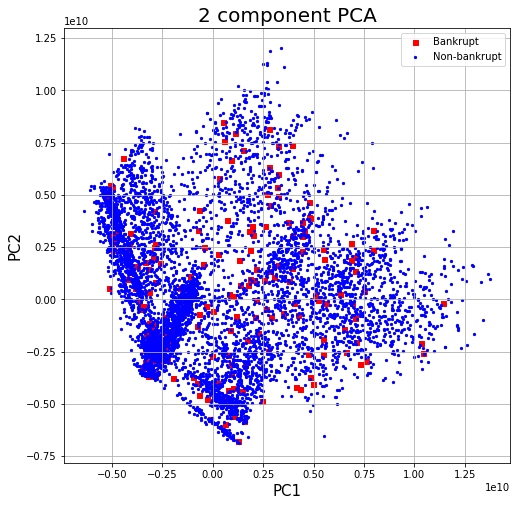

In [134]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

bankrupt_idx = final_df['Bankrupt?'] == 1
non_bankrupt_idx = final_df['Bankrupt?'] == 0

ax.scatter(final_df.loc[bankrupt_idx, 'pc1'], final_df.loc[bankrupt_idx, 'pc2'], c = 'r', s = 25, marker='s')
ax.scatter(final_df.loc[non_bankrupt_idx, 'pc1'], final_df.loc[non_bankrupt_idx, 'pc2'], c = 'b', s = 5)

ax.legend(['Bankrupt', 'Non-bankrupt'])
ax.grid()

In [178]:
results = {}

# Logistic Regression

In [99]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier


In [201]:
def logistic_regression(X, y, val_ratio=0.3, name='default'):
    global results
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = val_ratio) 
    
    # model
    reg = LogisticRegression() 
    reg.fit(X_train.to_numpy(), y_train.to_numpy().ravel()) 
    y_pred = reg.predict(X_test.to_numpy())  
    print("CONFUSION MATRIX:\n", confusion_matrix(y_test.to_numpy(), y_pred), '\n')
    print("OTHER METRICS:\n", classification_report(y_test.to_numpy(), y_pred))
    
    f1 = f1_score(y_test.to_numpy(), y_pred.astype('int64'), zero_division=1)
    results[len(results.items())] = ['logistic_regression_' + name, f1, len(y)]

In [202]:
logistic_regression(X=x, y=y)

CONFUSION MATRIX:
 [[1978    5]
 [  63    0]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1983
           1       0.00      0.00      0.00        63

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046



c:\users\maksym shvets\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Random Forest

In [203]:
def RandomForest(X, y, val_ratio=0.3, name='default'):
    global results
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = val_ratio) 
    
    # model
    rf = RandomForestClassifier(max_depth=4, random_state=0)
    rf.fit(X_train.to_numpy(), y_train.to_numpy().ravel())

    y_pred = rf.predict(X_test.to_numpy())  
    print("CONFUSION MATRIX:\n", confusion_matrix(y_test.to_numpy(), y_pred), '\n')
    print("OTHER METRICS:\n", classification_report(y_test.to_numpy(), y_pred))
    
    f1 = f1_score(y_test.to_numpy(), y_pred.astype('int64'), zero_division=1)
    results[len(results.items())] = ['RandomForest' + name, f1, len(y)]

In [204]:
RandomForest(X=x, y=y)

CONFUSION MATRIX:
 [[1980    3]
 [  57    6]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1983
           1       0.67      0.10      0.17        63

    accuracy                           0.97      2046
   macro avg       0.82      0.55      0.58      2046
weighted avg       0.96      0.97      0.96      2046



# Neural Network

In [205]:
import tensorflow as tf

In [1]:
def nn(X, y, val_ratio=0.3, name='default'):
    global results
    
    # split data
    while True:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = val_ratio) 
        if all(np.unique(y_test, return_counts=True)[1] > 50):
            break
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    # model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(95,), activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy', 'AUC'])
    model.fit(X_train.to_numpy(), y_train.to_numpy(), 
              validation_data=(X_test, y_test), batch_size=64, epochs=30)
    
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test.to_numpy(), y_pred.astype('int64'))
    print("\nConfusion matrix: \n", matrix)
    
    f1 = f1_score(y_test.to_numpy(), y_pred.astype('int64'), zero_division=1)
    results[len(results.items())] = ['Neural_Network' + name, f1, len(y)]
    print("\nF1 Score:", f1)

In [207]:
nn(X=x, y=y)

Epoch 1/30
75/75 [==============================] - 0s 2ms/step - loss: 17961142.0000 - accuracy: 0.9367 - val_loss: 5493661.5000 - val_accuracy: 0.9560
Epoch 2/30
75/75 [==============================] - 0s 1ms/step - loss: 5145105.0000 - accuracy: 0.9455 - val_loss: 4258626.0000 - val_accuracy: 0.9203
Epoch 3/30
75/75 [==============================] - 0s 1ms/step - loss: 3763994.7500 - accuracy: 0.9445 - val_loss: 3764046.2500 - val_accuracy: 0.9497
Epoch 4/30
75/75 [==============================] - 0s 1ms/step - loss: 2482746.0000 - accuracy: 0.9485 - val_loss: 2956225.5000 - val_accuracy: 0.9501
Epoch 5/30
75/75 [==============================] - 0s 1ms/step - loss: 2145145.0000 - accuracy: 0.9495 - val_loss: 3226495.7500 - val_accuracy: 0.9497
Epoch 6/30
75/75 [==============================] - 0s 1ms/step - loss: 2903697.5000 - accuracy: 0.9489 - val_loss: 3440185.5000 - val_accuracy: 0.9585
Epoch 7/30
75/75 [==============================] - 0s 1ms/step - loss: 2654138.0000 - 

# UNDERSAMPLING TECHNIQUES

## 1. NEAR-MISS

In [37]:
import sys
# !"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


In [34]:
from imblearn.under_sampling import NearMiss

The algorithm balances the data by looking at the class distribution and randomly eliminating samples from the larger class. When two points belonging to different classes are very close to each other in the distribution, this algorithm eliminates the datapoint of the larger class thereby trying to balance the distribution. 

### NearMiss has 3 versions:

Version 1: In the first version, the data is balanced by calculating the average minimum distance between the larger distribution and three closest smaller distributions.

Version 2: Here, the data is balanced by calculating the average minimum distance between the larger distribution and three furthest smaller distributions. 

Version 3: Here, the smaller class instances are considered and m neighbours are stored. Then the distance between this and the larger distribution is taken and the largest distance is eliminated. 

In [233]:
nm = NearMiss(version=2)
X_near, Y_near = nm.fit_resample(x.to_numpy(), y.to_numpy())
print(sorted(Counter(Y_near).items()))

[(0, 220), (1, 220)]


In [234]:
X_NearMiss = pd.DataFrame(X_near)
y_NearMiss = pd.DataFrame(Y_near, columns=['Bankrupt?'])

# PCA
principalComponents = pca.fit_transform(X_NearMiss)
pca_NearMiss = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

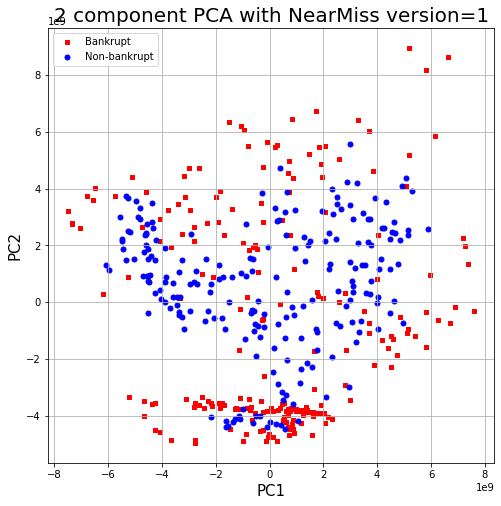

In [235]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA with NearMiss version=1', fontsize = 20)

bankrupt_idx = np.where(Y_near == 1)[0]
non_bankrupt_idx = np.where(Y_near == 0)[0]

ax.scatter(pca_NearMiss.loc[bankrupt_idx, 'pc1'], pca_NearMiss.loc[bankrupt_idx, 'pc2'], c = 'r', s = 15, marker='s')
ax.scatter(pca_NearMiss.loc[non_bankrupt_idx, 'pc1'], pca_NearMiss.loc[non_bankrupt_idx, 'pc2'], c = 'b', s = 25)

ax.legend(['Bankrupt', 'Non-bankrupt'])
ax.grid()

In [236]:
logistic_regression(X=X_NearMiss, y=y_NearMiss, name='near_miss')

CONFUSION MATRIX:
 [[55 20]
 [25 32]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        75
           1       0.62      0.56      0.59        57

    accuracy                           0.66       132
   macro avg       0.65      0.65      0.65       132
weighted avg       0.66      0.66      0.66       132



In [239]:
RandomForest(X=X_NearMiss, y=y_NearMiss, name='near_miss')

CONFUSION MATRIX:
 [[56 16]
 [ 8 52]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        72
           1       0.76      0.87      0.81        60

    accuracy                           0.82       132
   macro avg       0.82      0.82      0.82       132
weighted avg       0.82      0.82      0.82       132



In [238]:
nn(X=X_NearMiss, y=y_NearMiss, name='near_miss')

Epoch 1/30
5/5 [==============================] - 1s 47ms/step - loss: 85991392.0000 - accuracy: 0.6006 - val_loss: 48734648.0000 - val_accuracy: 0.6212
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 38183964.0000 - accuracy: 0.6883 - val_loss: 49006648.0000 - val_accuracy: 0.7121
Epoch 3/30
5/5 [==============================] - 0s 13ms/step - loss: 24247676.0000 - accuracy: 0.7955 - val_loss: 28485640.0000 - val_accuracy: 0.7652
Epoch 4/30
5/5 [==============================] - 0s 11ms/step - loss: 15017178.0000 - accuracy: 0.8312 - val_loss: 24997280.0000 - val_accuracy: 0.7576
Epoch 5/30
5/5 [==============================] - 0s 14ms/step - loss: 11254309.0000 - accuracy: 0.8182 - val_loss: 20026678.0000 - val_accuracy: 0.8182
Epoch 6/30
5/5 [==============================] - 0s 14ms/step - loss: 9471026.0000 - accuracy: 0.8636 - val_loss: 22261434.0000 - val_accuracy: 0.7803
Epoch 7/30
5/5 [==============================] - 0s 15ms/step - loss: 7045544.5000

## 2. Condensed Nearest Neighbor Rule Undersampling

In [54]:
from imblearn.under_sampling import CondensedNearestNeighbour 

In the Condensed Nearest neighbor method, the aim is to choose a subset of a collection of samples
that results in no loss in model performance. The method requires many passes over the training data
which can make Condensed Nearest Neighbor a slower method compared to others (More, 2016). The
method works by numerating the examples in the dataset and adding them in a so called “store”.
However, this is done only if they cannot be classified correctly by the current contents of the “store”
(Hart, 1968)

In [53]:
cnn = CondensedNearestNeighbour(random_state=33) 
X_cnn, y_cnn = cnn.fit_resample(x.to_numpy(), y.to_numpy()) 

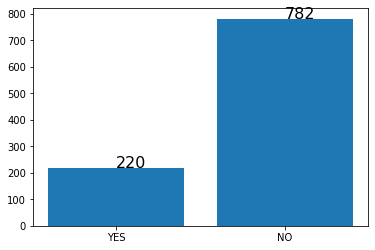

In [67]:
plt.bar(['YES', 'NO'], [Counter(y_cnn)[1], Counter(y_cnn)[0]])
add_value_label(['YES', 'NO'], [Counter(y_cnn)[1], Counter(y_cnn)[0]])

In [64]:
X_CNN = pd.DataFrame(X_cnn)
y_CNN = pd.DataFrame(y_cnn, columns=['Bankrupt?'])

# PCA
principalComponents = pca.fit_transform(X_CNN)
pca_CNN = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

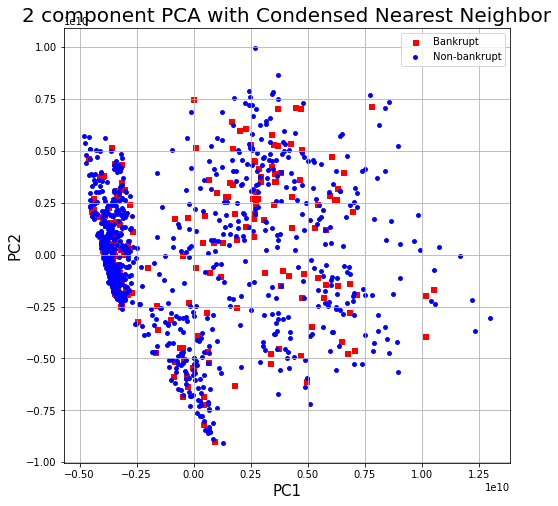

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA with Condensed Nearest Neighbor', fontsize = 20)

bankrupt_idx = np.where(y_cnn == 1)[0]
non_bankrupt_idx = np.where(y_cnn == 0)[0]

ax.scatter(pca_CNN.loc[bankrupt_idx, 'pc1'], pca_CNN.loc[bankrupt_idx, 'pc2'], c = 'r', s = 25, marker='s')
ax.scatter(pca_CNN.loc[non_bankrupt_idx, 'pc1'], pca_CNN.loc[non_bankrupt_idx, 'pc2'], c = 'b', s = 15)

ax.legend(['Bankrupt', 'Non-bankrupt'])
ax.grid()

In [240]:
logistic_regression(X=X_CNN, y=y_CNN, name='condensed_nearest_neighbor')

CONFUSION MATRIX:
 [[237   4]
 [ 59   1]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       241
           1       0.20      0.02      0.03        60

    accuracy                           0.79       301
   macro avg       0.50      0.50      0.46       301
weighted avg       0.68      0.79      0.71       301



c:\users\maksym shvets\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [241]:
RandomForest(X=X_CNN, y=y_CNN, name='condensed_nearest_neighbor')

CONFUSION MATRIX:
 [[223  15]
 [ 28  35]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       238
           1       0.70      0.56      0.62        63

    accuracy                           0.86       301
   macro avg       0.79      0.75      0.77       301
weighted avg       0.85      0.86      0.85       301



In [242]:
nn(X=X_CNN, y=y_CNN, name='condensed_nearest_neighbor')

Epoch 1/30
11/11 [==============================] - 1s 20ms/step - loss: 247457808.0000 - accuracy: 0.6163 - val_loss: 251202992.0000 - val_accuracy: 0.7575
Epoch 2/30
11/11 [==============================] - 0s 7ms/step - loss: 141162288.0000 - accuracy: 0.7632 - val_loss: 87423704.0000 - val_accuracy: 0.6711
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 65698612.0000 - accuracy: 0.6134 - val_loss: 72112016.0000 - val_accuracy: 0.7309
Epoch 4/30
11/11 [==============================] - 0s 7ms/step - loss: 47327456.0000 - accuracy: 0.7404 - val_loss: 54859348.0000 - val_accuracy: 0.5449
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 27198620.0000 - accuracy: 0.7175 - val_loss: 41667648.0000 - val_accuracy: 0.6578
Epoch 6/30
11/11 [==============================] - 0s 8ms/step - loss: 21694076.0000 - accuracy: 0.6961 - val_loss: 33613636.0000 - val_accuracy: 0.6346
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 

## 3. Tomek Links

In [71]:
from imblearn.under_sampling import TomekLinks 

In [72]:
tomek_links = TomekLinks()
X_tl, y_tl = tomek_links.fit_resample(x.to_numpy(), y.to_numpy())
print(Counter(y_tl))

Counter({0: 6508, 1: 220})


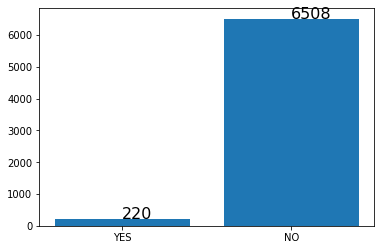

In [73]:
plt.bar(['YES', 'NO'], [Counter(y_tl)[1], Counter(y_tl)[0]])
add_value_label(['YES', 'NO'], [Counter(y_tl)[1], Counter(y_tl)[0]])

## 4. Cluster Centroids

In [74]:
from imblearn.under_sampling import ClusterCentroids 

In [75]:
cc = ClusterCentroids(random_state=34)
X_cc, y_cc = cc.fit_resample(x.to_numpy(), y.to_numpy())
print(Counter(y_cc))

Counter({0: 220, 1: 220})


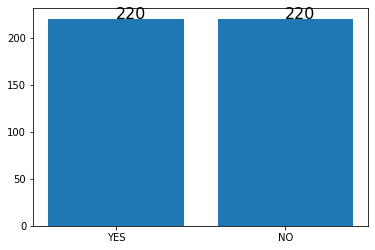

In [76]:
plt.bar(['YES', 'NO'], [Counter(y_cc)[1], Counter(y_cc)[0]])
add_value_label(['YES', 'NO'], [Counter(y_cc)[1], Counter(y_cc)[0]])

In [77]:
X_central = pd.DataFrame(X_cc)
y_central = pd.DataFrame(y_cc, columns=['Bankrupt?'])

# PCA
principalComponents = pca.fit_transform(X_central)
pca_Central_Centroins = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

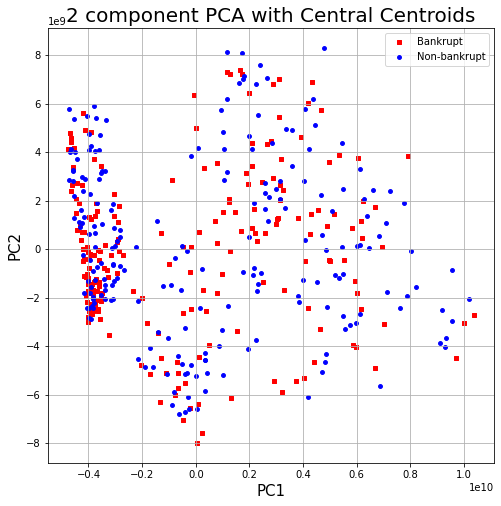

In [78]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA with Central Centroids', fontsize = 20)

bankrupt_idx = np.where(y_central == 1)[0]
non_bankrupt_idx = np.where(y_central == 0)[0]

ax.scatter(pca_Central_Centroins.loc[bankrupt_idx, 'pc1'], pca_Central_Centroins.loc[bankrupt_idx, 'pc2'], c = 'r', s = 15, marker='s')
ax.scatter(pca_Central_Centroins.loc[non_bankrupt_idx, 'pc1'], pca_Central_Centroins.loc[non_bankrupt_idx, 'pc2'], c = 'b', s = 15)

ax.legend(['Bankrupt', 'Non-bankrupt'])
ax.grid()

In [214]:
logistic_regression(X=X_central, y=y_central, name='Central Centroids')

CONFUSION MATRIX:
 [[46 20]
 [20 46]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        66
           1       0.70      0.70      0.70        66

    accuracy                           0.70       132
   macro avg       0.70      0.70      0.70       132
weighted avg       0.70      0.70      0.70       132



c:\users\maksym shvets\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [215]:
RandomForest(X=X_central, y=y_central, name='Central Centroids')

CONFUSION MATRIX:
 [[59  4]
 [ 4 65]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.94      0.94      0.94        69

    accuracy                           0.94       132
   macro avg       0.94      0.94      0.94       132
weighted avg       0.94      0.94      0.94       132



In [216]:
nn(X=X_central, y=y_central, name='Central Centroids')

Epoch 1/30
5/5 [==============================] - 0s 26ms/step - loss: 194950880.0000 - accuracy: 0.5032 - val_loss: 169630464.0000 - val_accuracy: 0.4924
Epoch 2/30
5/5 [==============================] - 0s 6ms/step - loss: 107635536.0000 - accuracy: 0.5227 - val_loss: 90841056.0000 - val_accuracy: 0.5379
Epoch 3/30
5/5 [==============================] - 0s 6ms/step - loss: 64140220.0000 - accuracy: 0.5519 - val_loss: 72036768.0000 - val_accuracy: 0.5303
Epoch 4/30
5/5 [==============================] - 0s 7ms/step - loss: 45834452.0000 - accuracy: 0.5909 - val_loss: 69082752.0000 - val_accuracy: 0.4773
Epoch 5/30
5/5 [==============================] - 0s 5ms/step - loss: 32009276.0000 - accuracy: 0.6299 - val_loss: 60517528.0000 - val_accuracy: 0.4848
Epoch 6/30
5/5 [==============================] - 0s 5ms/step - loss: 26178814.0000 - accuracy: 0.6234 - val_loss: 61567080.0000 - val_accuracy: 0.5303
Epoch 7/30
5/5 [==============================] - 0s 6ms/step - loss: 23222414.0000 

# OVER-SAMPLING TECHNIQUES

## 1. Random Over-Sampling

In [217]:
from imblearn.over_sampling import RandomOverSampler

In [119]:
ros = RandomOverSampler(random_state=31)
X_res, y_res = ros.fit_resample(x.to_numpy(), y.to_numpy())
print(Counter(y_res))

Counter({1: 6599, 0: 6599})


In [120]:
X_ROS = pd.DataFrame(X_res)
y_ROS = pd.DataFrame(y_res, columns=['Bankrupt?'])

# PCA
principalComponents = pca.fit_transform(X_ROS)
pca_ROS = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

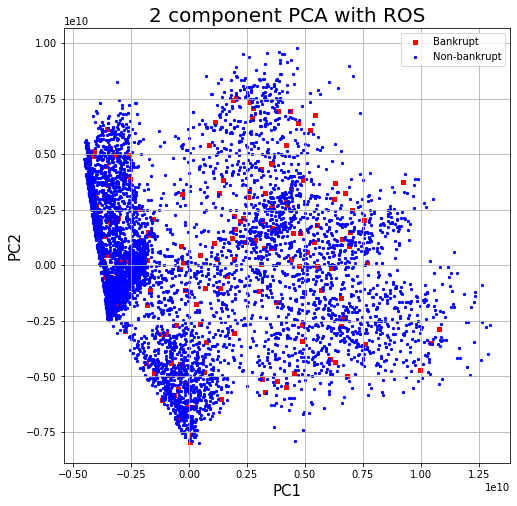

In [121]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA with ROS', fontsize = 20)

bankrupt_idx = np.where(y_ROS == 1)[0]
non_bankrupt_idx = np.where(y_ROS == 0)[0]

ax.scatter(pca_ROS.loc[bankrupt_idx, 'pc1'], pca_ROS.loc[bankrupt_idx, 'pc2'], c = 'r', s = 15, marker='s')
ax.scatter(pca_ROS.loc[non_bankrupt_idx, 'pc1'], pca_ROS.loc[non_bankrupt_idx, 'pc2'], c = 'b', s = 5)

ax.legend(['Bankrupt', 'Non-bankrupt'])
ax.grid()

In [218]:
logistic_regression(X=X_ROS, y=y_ROS, name='random_over_sampling')

CONFUSION MATRIX:
 [[1431  521]
 [1013  995]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65      1952
           1       0.66      0.50      0.56      2008

    accuracy                           0.61      3960
   macro avg       0.62      0.61      0.61      3960
weighted avg       0.62      0.61      0.61      3960



c:\users\maksym shvets\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [219]:
RandomForest(X=X_ROS, y=y_ROS, name='random_over_sampling')

CONFUSION MATRIX:
 [[1783  193]
 [ 144 1840]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91      1976
           1       0.91      0.93      0.92      1984

    accuracy                           0.91      3960
   macro avg       0.92      0.91      0.91      3960
weighted avg       0.92      0.91      0.91      3960



In [220]:
nn(X=X_ROS, y=y_ROS, name='random_over_sampling')

Epoch 1/30
145/145 [==============================] - 0s 2ms/step - loss: 33980876.0000 - accuracy: 0.6229 - val_loss: 12041670.0000 - val_accuracy: 0.6364
Epoch 2/30
145/145 [==============================] - 0s 1ms/step - loss: 7951872.0000 - accuracy: 0.7127 - val_loss: 8362246.0000 - val_accuracy: 0.7207
Epoch 3/30
145/145 [==============================] - 0s 1ms/step - loss: 5467453.5000 - accuracy: 0.7516 - val_loss: 4859484.5000 - val_accuracy: 0.7694
Epoch 4/30
145/145 [==============================] - 0s 1ms/step - loss: 3987561.0000 - accuracy: 0.7811 - val_loss: 2499805.2500 - val_accuracy: 0.8283
Epoch 5/30
145/145 [==============================] - 0s 1ms/step - loss: 4557046.0000 - accuracy: 0.7730 - val_loss: 3856310.7500 - val_accuracy: 0.8220
Epoch 6/30
145/145 [==============================] - 0s 1ms/step - loss: 4445457.5000 - accuracy: 0.7809 - val_loss: 5456352.5000 - val_accuracy: 0.8056
Epoch 7/30
145/145 [==============================] - 0s 1ms/step - loss: 

## 2. SMOTE

In [126]:
from imblearn.over_sampling import SMOTE

In [127]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x.to_numpy(), y.to_numpy())
print(Counter(y_res))

Counter({1: 6599, 0: 6599})


In [128]:
X_smote = pd.DataFrame(X_res)
y_smote = pd.DataFrame(y_res, columns=['Bankrupt?'])

# PCA
principalComponents = pca.fit_transform(X_smote)
pca_smote = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

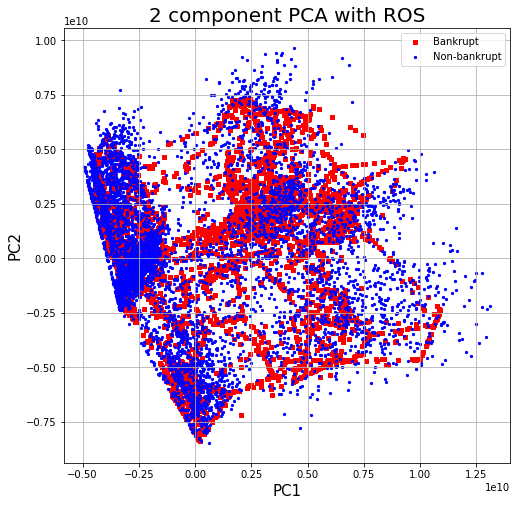

In [129]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA with ROS', fontsize = 20)

bankrupt_idx = np.where(y_smote == 1)[0]
non_bankrupt_idx = np.where(y_smote == 0)[0]

ax.scatter(pca_smote.loc[bankrupt_idx, 'pc1'], pca_smote.loc[bankrupt_idx, 'pc2'], c = 'r', s = 15, marker='s')
ax.scatter(pca_smote.loc[non_bankrupt_idx, 'pc1'], pca_smote.loc[non_bankrupt_idx, 'pc2'], c = 'b', s = 5)

ax.legend(['Bankrupt', 'Non-bankrupt'])
ax.grid()

In [221]:
logistic_regression(X=X_smote, y=y_smote, name='smote')

CONFUSION MATRIX:
 [[1474  546]
 [1024  916]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65      2020
           1       0.63      0.47      0.54      1940

    accuracy                           0.60      3960
   macro avg       0.61      0.60      0.60      3960
weighted avg       0.61      0.60      0.60      3960



c:\users\maksym shvets\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [222]:
RandomForest(X=X_smote, y=y_smote, name='smote')

CONFUSION MATRIX:
 [[1795  195]
 [ 168 1802]] 

OTHER METRICS:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1990
           1       0.90      0.91      0.91      1970

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



In [223]:
nn(X=X_smote, y=y_smote, name='smote')

Epoch 1/30
145/145 [==============================] - 1s 2ms/step - loss: 38132752.0000 - accuracy: 0.6297 - val_loss: 11730689.0000 - val_accuracy: 0.6955
Epoch 2/30
145/145 [==============================] - 0s 1ms/step - loss: 9454922.0000 - accuracy: 0.7137 - val_loss: 12353305.0000 - val_accuracy: 0.7237
Epoch 3/30
145/145 [==============================] - 0s 1ms/step - loss: 5646118.5000 - accuracy: 0.7628 - val_loss: 6129791.5000 - val_accuracy: 0.7674
Epoch 4/30
145/145 [==============================] - 0s 1ms/step - loss: 4601250.0000 - accuracy: 0.7808 - val_loss: 7112687.5000 - val_accuracy: 0.7515
Epoch 5/30
145/145 [==============================] - 0s 1ms/step - loss: 4298660.5000 - accuracy: 0.7872 - val_loss: 5012207.0000 - val_accuracy: 0.7662
Epoch 6/30
145/145 [==============================] - 0s 1ms/step - loss: 4324796.0000 - accuracy: 0.7940 - val_loss: 3829170.0000 - val_accuracy: 0.8018
Epoch 7/30
145/145 [==============================] - 0s 1ms/step - loss:

#### more on https://imbalanced-learn.org/stable/references/under_sampling.html

In [229]:
pd.DataFrame.from_dict(results, orient='index', columns=['Algorithm', 'F1-Score', 'number of rows in dataset']).sort_values('F1-Score')

,Algorithm,F1-Score,number of rows in dataset
18,logistic_regression_default,0.000000,6819
0,logistic_regression_default,0.022727,2046
6,logistic_regression_condensed_nearest_neighbor,0.030769,301
24,logistic_regression_condensed_nearest_neighbor,0.048193,1002
2,Neural_Networkdefault,0.109375,2046
20,Neural_Networkdefault,0.156522,6819
19,RandomForestdefault,0.166667,6819
8,Neural_Networkcondensed_nearest_neighbor,0.169231,301
1,RandomForestdefault,0.238806,2046
26,Neural_Networkcondensed_nearest_neighbor,0.263473,1002
